## This file contains the first atempt to solve the problematiques.</br>
That's why the file will not be presented properly..

In [4]:
import pandas as pd
from dataVisualisation import viewData, viewDistrib
import re
from bs4 import BeautifulSoup
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

In [5]:
viewData("archive/IMDB Dataset.csv")

collonnes :  Index(['review', 'sentiment'], dtype='object')
nombre de ligne :  50000
premières lignes du fichier : 
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Répartition des labels :
positive: 25000 images
negative: 25000 images


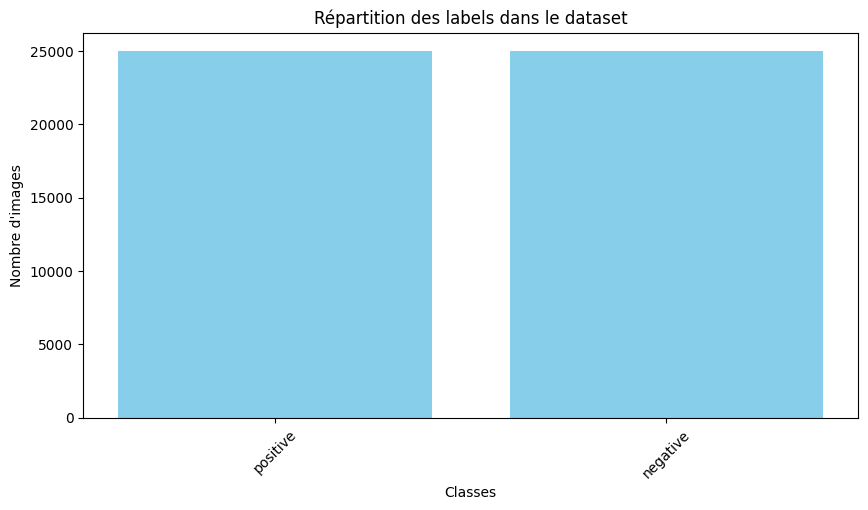

In [6]:
viewDistrib("archive/IMDB Dataset.csv")

Aucun problème d'échantillonage, Nous commenceron donc le prétraitement

In [7]:
# Charger le modèle NLP anglais de spaCy
import spacy
from bs4 import BeautifulSoup

# Charger le modèle NLP anglais de spaCy
nlp = spacy.load("en_core_web_sm")

'''
    Fonction permettant de netoyer le texte. On y enlève tout les /br, caractères spéciaux ect...
'''
def textCleaner(text):
    # Supprimer le HTML de la chaîne (ex: <br />, etc.)
    text = BeautifulSoup(text, "html.parser").get_text()

    # Appliquer NLP après avoir tout mis en minuscule
    doc = nlp(text.lower())

    # Filtrer et lemmatiser les mots
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop       # enlever les mots inutiles ("the", "is", etc.)
        and not token.is_punct     # enlever la ponctuation
        and not token.is_digit     # pas les chiffres
        and token.is_alpha         # garder que les lettres (pas "123abc", etc.)
    ]

    return " ".join(tokens)

print(textCleaner("One of the other reviewers has mentioned that "))


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

#### Explication des outils uttilisé : <br>
token object : is a sequence of letters or special character forming a word<br>
nlp object : object that use natural language processing technologie (tekkenisation, lemmentisation, ect...)<br>
doc object : is a sequence of token object, it contain the result of a nlp processing of the text.<br>
spacy.load : command that charge a nlp pre-train object<br>
tex = nlp("text") : apply the nlp model to the "text", the result is a doc.<br>
token.lemma_ : gove the lemma of the tokken. Example => 'runnig' --> 'run'<br>
token.is_stop : return True if the token is a stopWord<br>
token.is_punct : return True if the tokken is a puntuation<br>
token.is_digit : return True if the tokken is made up of numbers<br>
token.is_alpha : return True if the tokken is made up of letters<br>
<br>

In [ ]:
# Enregistre le df dans un fichier csv
def saveDF(df, number):
    df.to_csv(f"clean_IMDB{number}.csv", index=False)
    df.to_pickle(f"clean_IMDB{number}.pkl")


In [30]:
df = pd.read_csv("archive/IMDB Dataset.csv")
'''df["cleanText"] = textCleaner(df)

print(df.head(100))'''

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess


stop_words = set(stopwords.words("english"))

def fastDataCleaner(data):
    
    # 1. Supprimer balises HTML
    text = BeautifulSoup(text, "html.parser").get_text()

    # 2. Tokenizer + nettoyage avec gensim
    tokens = simple_preprocess(text, deacc=True)  # deacc=True supprime ponctuation

    # 3. Supprimer stopwords
    tokens = [tok for tok in tokens if tok not in stop_words]

    return " ".join(tokens)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\djibr/nltk_data'
    - 'c:\\Users\\djibr\\miniconda3\\envs\\terEnv\\nltk_data'
    - 'c:\\Users\\djibr\\miniconda3\\envs\\terEnv\\share\\nltk_data'
    - 'c:\\Users\\djibr\\miniconda3\\envs\\terEnv\\lib\\nltk_data'
    - 'C:\\Users\\djibr\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
fastClDF = fastDataCleaner(df)

df.head

In [31]:
def DataCleaner(data):
    clean_reviews = []
    print(type(data["review"]))
    print(len(data["review"]))
    i = 0
    for i, rev in enumerate(data["review"]):   # enumerate pour suivre les itérations
        print(f"Iteration {i} : {rev[:50]}...")  # affiche les 50 premiers caractères
        clean_reviews.append(textCleaner(rev))
        
    
    data["clean_reviews"] = clean_reviews

    return data

In [32]:
cdf = DataCleaner(df)

cdf.head()

<class 'pandas.core.series.Series'>
50000
Iteration 0 : One of the other reviewers has mentioned that afte...
Iteration 1 : A wonderful little production. <br /><br />The fil...
Iteration 2 : I thought this was a wonderful way to spend time o...
Iteration 3 : Basically there's a family where a little boy (Jak...
Iteration 4 : Petter Mattei's "Love in the Time of Money" is a v...
Iteration 5 : Probably my all-time favorite movie, a story of se...
Iteration 6 : I sure would like to see a resurrection of a up da...
Iteration 7 : This show was an amazing, fresh & innovative idea ...
Iteration 8 : Encouraged by the positive comments about this fil...
Iteration 9 : If you like original gut wrenching laughter you wi...
Iteration 10 : Phil the Alien is one of those quirky films where ...
Iteration 11 : I saw this movie when I was about 12 when it came ...
Iteration 12 : So im not a big fan of Boll's work but then again ...
Iteration 13 : The cast played Shakespeare.<br /><br />Shakespear...
It

KeyboardInterrupt: 

this method took 40 minutes tu complites and clean the DataSet. Let's try another verthion of pretreatement. 

In [33]:
cdf.head()

cleanData = cdf.drop('review', axis=1)
cleanData.head()

,sentiment,clean_reviews
0,positive,reviewer mention watch oz episode hook right e...
1,positive,wonderful little production filming technique ...
2,positive,think wonderful way spend time hot summer week...
3,negative,basically family little boy jake think zombie ...
4,positive,petter mattei love time money visually stunnin...


In [ ]:
cleanedData =  

Nous avons notre dataFrame claire et nétoyer. Maintenant un problème s'impose... Comment les algorythmes de machines learning vont comprendre des Mots ???? Nous vectoriserons donc avec Word2Vec

In [ ]:
# Vectorisation de notre dataFrame avec Word2Vec
# Création du modèle word2vev

model = gensim.models.Word2Vec(
    windows = 10,
    min_count = 2,
    workers=4
)    

In [ ]:
model.build_vocab(cdf, progress_per=1000) # progress_per : Indicates how many words to process before showing/updating the progress.

here, windows mean the number of word conbcidered after and before the target word.
min_count is the minim size of the sentece. If the sentence is composed by less than two word, it wil not be concidered by the training.
Workers is the number of thread used for the training

## Random Forest !!

In [ ]:
from sklearn.esemble import RandomForestClassifier